In [23]:
with open('dev.txt', 'r') as f:
    x = f.read()

test = x.split('\n')

subgraph = []
for t in test:
    subgraph.append(t.split('\t'))

In [32]:
subgraph

[['/m/06wxw', '/location/location/time_zones', '/m/02fqwt'],
 ['/m/02fqwt', '_/location/location/time_zones', '/m/06wxw'],
 ['/m/018gz8', '/people/profession/people_with_this_profession', '/m/01520h'],
 ['/m/01520h', '_/people/profession/people_with_this_profession', '/m/018gz8'],
 ['/m/03swmf',
  '/people/person/education./education/education/major_field_of_study',
  '/m/06nm1'],
 ['/m/06nm1',
  '_/people/person/education./education/education/major_field_of_study',
  '/m/03swmf'],
 ['/m/01t94_1',
  '/people/person/spouse_s./people/marriage/type_of_union',
  '/m/04ztj'],
 ['/m/04ztj',
  '_/people/person/spouse_s./people/marriage/type_of_union',
  '/m/01t94_1'],
 ['/m/0np9r', '/people/profession/people_with_this_profession', '/m/010p3'],
 ['/m/010p3', '_/people/profession/people_with_this_profession', '/m/0np9r'],
 ['/m/02ctzb', '/people/ethnicity/people', '/m/081t6'],
 ['/m/081t6', '_/people/ethnicity/people', '/m/02ctzb'],
 ['/m/0dq9wx', '/people/person/ethnicity', '/m/059_w'],
 ['/m/

In [45]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

['']


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

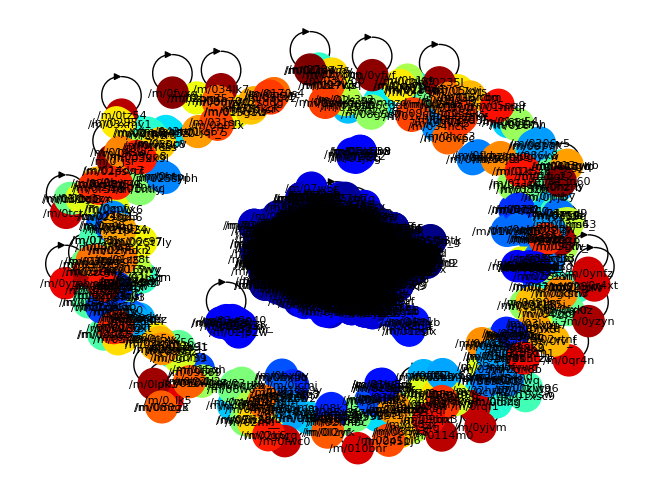

In [46]:

G = nx.DiGraph()

# Agrego los edge al grafo
for edge in subgraph:
    try:
        G.add_edge(edge[0], edge[2])
    except:
        print(edge)

# Uso greedy para encontrar comunidades
communities = list(greedy_modularity_communities(G))

# Mapeo un color para cada comunidad
node_colors = {}
for idx, cluster in enumerate(communities):
    for node in cluster:
        node_colors[node] = idx

# Genero el grafico
pos = nx.spring_layout(G)
node_color_values = [node_colors[node] for node in G.nodes()]
nx.draw(G, pos, node_color=node_color_values, cmap=plt.cm.jet, with_labels=True, font_size=8, font_color='black', node_size=500)

sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=len(communities) - 1))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=range(len(communities)))
cbar.set_label('Community', rotation=270, labelpad=15)

plt.show()